In [62]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# Employee Attrition dataset from kaggle competition
# Created by IBM data scientists for HR 
# Read the data set 

df = pd.read_csv("Employee-Attrition.csv")
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


## Exploratory Data Analysis

Lets begin by looking at the percentage of employee's who are considered attrited, and how many are not.

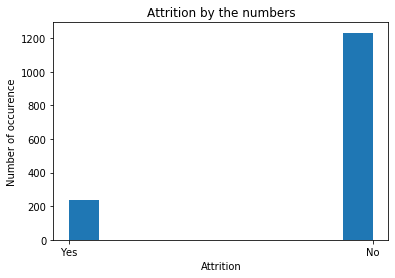

Yes:  237
No:  1233


In [64]:
plt.hist(df.Attrition)
plt.title('Attrition by the numbers')
plt.xlabel('Attrition')
plt.ylabel('Number of occurence')
plt.show();

# How many records 
print('Yes: ', df.loc[df['Attrition'] == 'Yes','Attrition'].count())
print('No: ', df.loc[df['Attrition'] == 'No','Attrition'].count())

### Attrition by hourly rate 

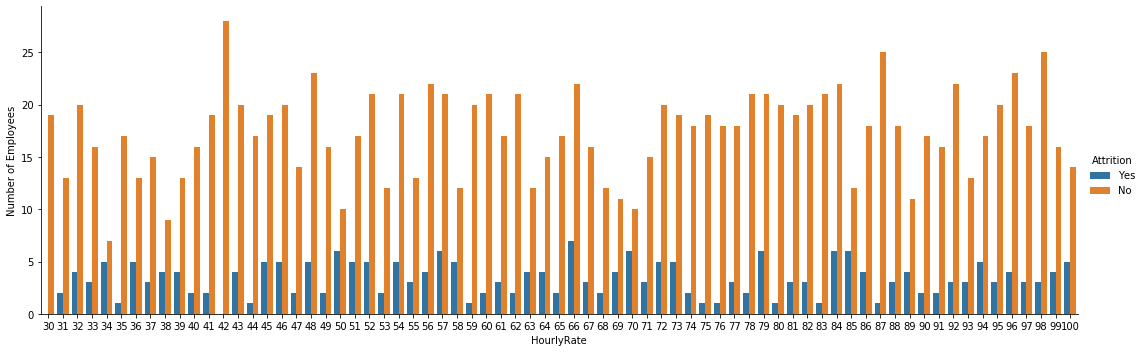

In [65]:
sns.axes_style('whitegrid')
sns.catplot('HourlyRate', data=df, aspect=3, kind='count', hue='Attrition').set_ylabels('Number of Employees')

### Attrition by monthly income

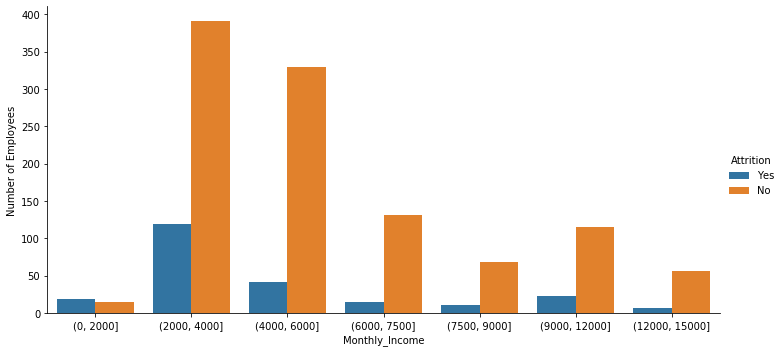

In [66]:
bins = [0, 2000, 4000, 6000, 7500, 9000, 12000, 15000]
df['Monthly_Income'] = pd.cut(df['MonthlyIncome'], bins)

sns.axes_style('whitegrid')
sns.catplot('Monthly_Income', data=df, aspect=2, kind='count', hue='Attrition').set_ylabels('Number of Employees')

Attrition does not seem to be affected by pay since there is attrition across all pay scale, lets see the relationship between overtime and attrition

### Attrition vs Overtime

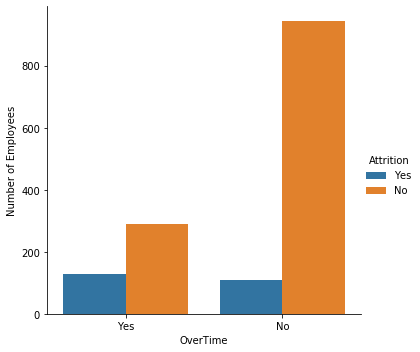

In [67]:
sns.axes_style('whitegrid')
sns.catplot('OverTime', data=df, aspect=1, kind='count', hue='Attrition').set_ylabels('Number of Employees')

In [68]:
Ratio = df.OverTime.value_counts()/df.Attrition.value_counts()
Ratio

No     0.854826
Yes    1.755274
dtype: float64

Overtime could be something to look at.

### Age

60
18 

30s      622
40s      349
20s      309
50s      168
Teens     17
60s        5
Name: Age_Group, dtype: int64 



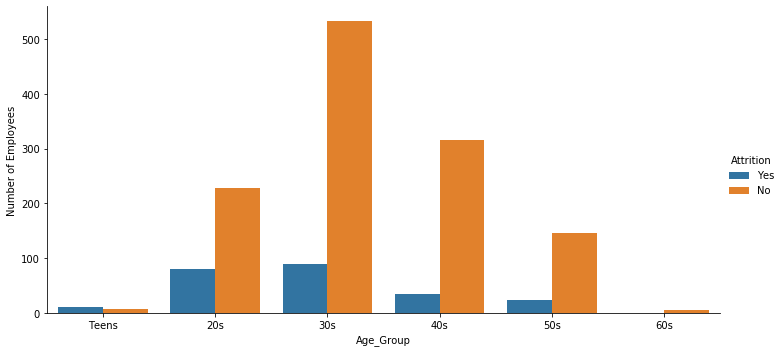

In [69]:
# Check min and max
print(df['Age'].max())
print(df['Age'].min(),'\n')

# bin by age
df['Age_Group'] = pd.cut(x = df['Age'],bins= [10, 19, 29, 39, 49, 59, 69], labels = ['Teens','20s','30s','40s','50s','60s'])
print(df.Age_Group.value_counts(),'\n')

sns.axes_style('whitegrid')
sns.catplot('Age_Group', data=df, aspect=2, kind='count', hue='Attrition').set_ylabels('Number of Employees')

### Department

In [70]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

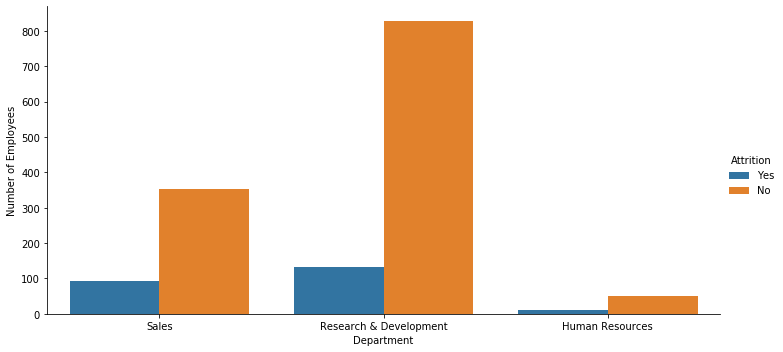

In [71]:
sns.axes_style('whitegrid')
sns.catplot('Department', data=df, aspect=2, kind='count', hue='Attrition').set_ylabels('Number of Employees')

### Job Role

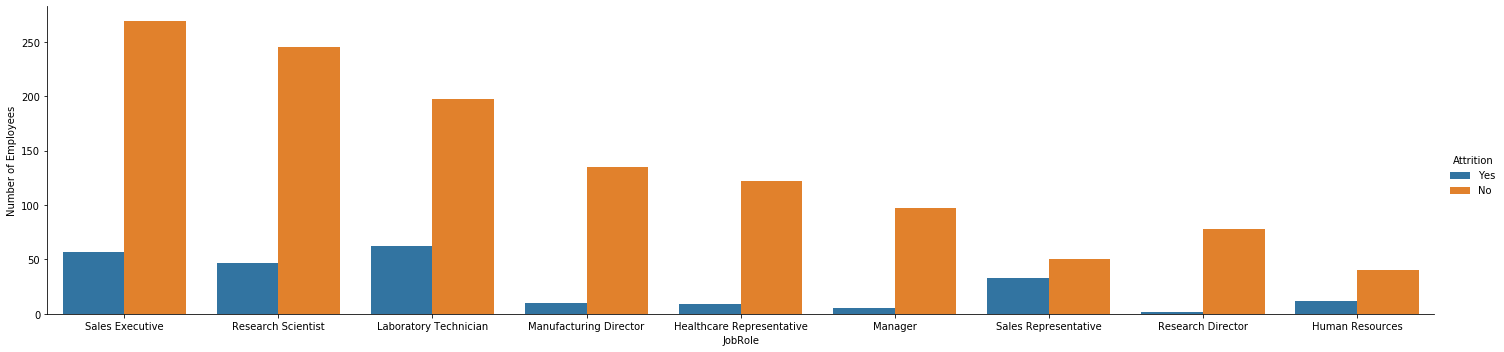

In [72]:
sns.axes_style('whitegrid')
sns.catplot('JobRole', data=df, aspect=4, kind='count', hue='Attrition').set_ylabels('Number of Employees')

### Over 18

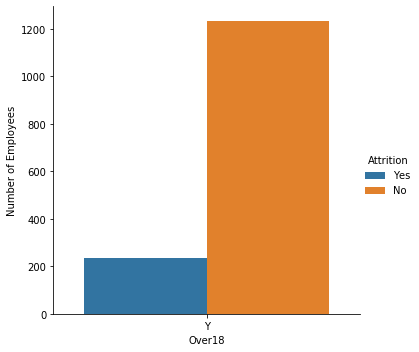

In [73]:
sns.axes_style('whitegrid')
sns.catplot('Over18', data=df, aspect=1, kind='count', hue='Attrition').set_ylabels('Number of Employees')

### Employee Count

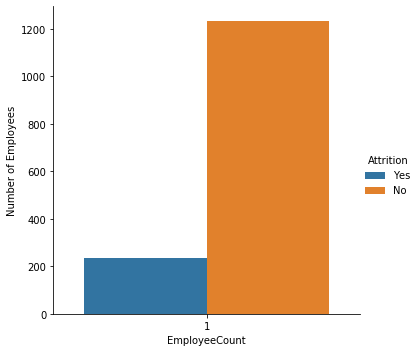

In [74]:
sns.axes_style('whitegrid')
sns.catplot('EmployeeCount', data=df, aspect=1, kind='count', hue='Attrition').set_ylabels('Number of Employees')

### Employee Number

In [75]:
df.EmployeeNumber.value_counts()

2046    1
641     1
644     1
645     1
647     1
       ..
1364    1
1367    1
1368    1
1369    1
2048    1
Name: EmployeeNumber, Length: 1470, dtype: int64

### Business Travel

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64 



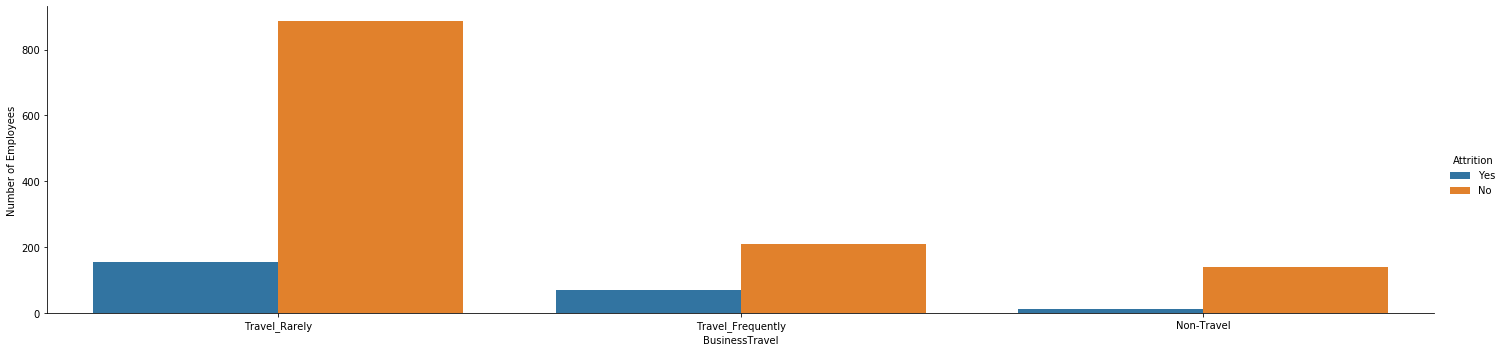

In [76]:
print(df.BusinessTravel.value_counts(),'\n')
sns.axes_style('whitegrid')
sns.catplot('BusinessTravel', data=df, aspect=4, kind='count', hue='Attrition').set_ylabels('Number of Employees')

### Daily Rate

In [77]:
print(df.DailyRate.value_counts(),'\n')

691     6
1082    5
329     5
1329    5
530     5
       ..
897     1
891     1
889     1
888     1
102     1
Name: DailyRate, Length: 886, dtype: int64 



### Environment Satisfaction

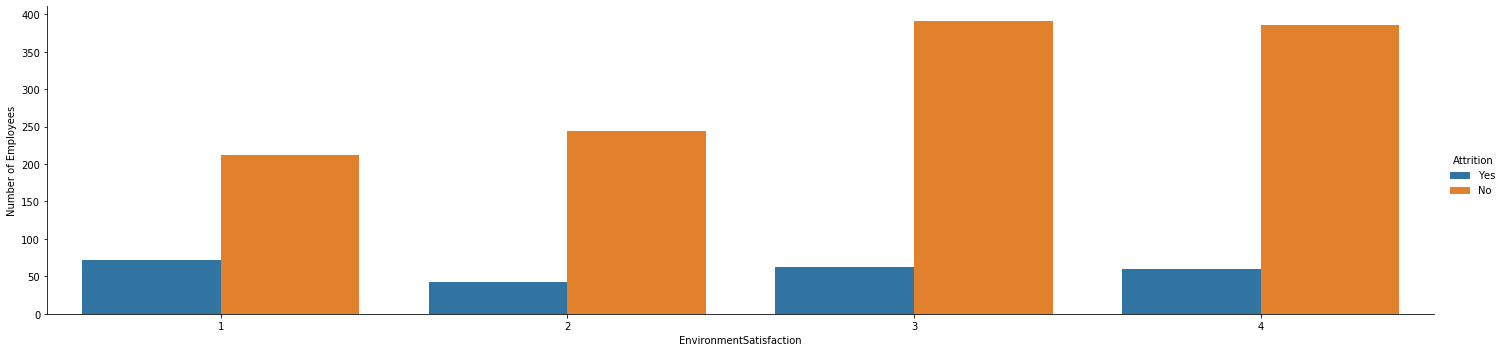

In [78]:
### Environment Satisfaction
sns.axes_style('whitegrid')
sns.catplot('EnvironmentSatisfaction', data=df, aspect=4, kind='count', hue='Attrition').set_ylabels('Number of Employees')

### Education

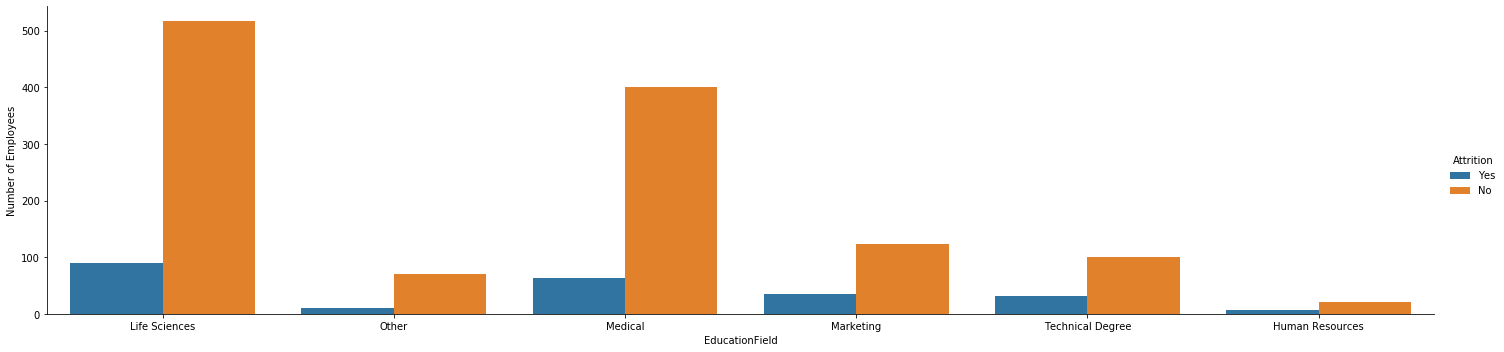

In [79]:
sns.axes_style('whitegrid')
sns.catplot('EducationField', data=df, aspect=4, kind='count', hue='Attrition').set_ylabels('Number of Employees')

## Feature Selection

In [80]:
# Delete unnecessary columns
df = df.drop(columns=['Over18', 'EmployeeCount', 'DailyRate', 'EmployeeNumber', 'StandardHours', 'Monthly_Income', 'Age_Group'])

In [81]:
# Label categorical data
categorical_data = {
    'Attrition': {'No':0, 'Yes':1}, 
    'BusinessTravel': {'Non-Travel':0, 'Travel_Frequently':1, 'Travel_Rarely':2}, 
    'Department': {'Human Resources':0, 'Research & Development':1, 'Sales':2}, 
    'EducationField': {'Human Resources':0, 'Life Sciences':1, 'Marketing':2, 'Medical':3, 'Technical Degree':4, 'Other':5}, 
    'Gender': {'Female':0, 'Male':0}, 
    'JobRole': {'Healthcare Representative':0, 'Human Resources':1, 'Laboratory Technician':2, 'Manager':3, 'Manufacturing Director':4, 'Research Director':5, 'Research Scientist':6, 'Sales Executive':7, 'Sales Representative':8}, 
    'MaritalStatus': {'Divorced':0, 'Single':1, 'Married':2}, 
    'OverTime': {'No':0, 'Yes':1}}
df = df.replace(categorical_data)
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,1,2,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,1,8,1,1,3,0,61,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1,2,2,5,4,0,92,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1,3,4,1,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,1,2,1,3,1,0,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,1,23,2,3,3,0,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,1,6,1,3,4,0,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,1,4,3,1,2,0,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,2,2,3,3,4,0,63,...,3,4,0,17,3,2,9,6,0,8


In [87]:
# Export the new data to new csv
df.to_csv(r"employee_final.csv", index = False)